In [75]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import acquire
import prepare

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

## Using titanic data

In [76]:
# pulling in titanic data with function
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
# splitting titanic data into train, test, validate with function
train, validate, test = prepare.prep_titanic_data(df)
train.shape

(498, 14)

In [4]:
validate.shape

(214, 14)

In [5]:
test.shape

(179, 14)

In [6]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,0,1,1,0,0
165,1,3,male,9.0,0,2,20.5250,Southampton,0,0,1,0,0,1
50,0,3,male,7.0,4,1,39.6875,Southampton,0,0,1,0,0,1
259,1,2,female,50.0,0,1,26.0000,Southampton,0,1,0,0,0,1
306,1,1,female,NaN,0,0,110.8833,Cherbourg,1,1,0,1,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sex                      498 non-null    object 
 3   age                      401 non-null    float64
 4   sibsp                    498 non-null    int64  
 5   parch                    498 non-null    int64  
 6   fare                     498 non-null    float64
 7   embark_town              498 non-null    object 
 8   alone                    498 non-null    int64  
 9   sex_female               498 non-null    uint8  
 10  sex_male                 498 non-null    uint8  
 11  embark_town_Cherbourg    498 non-null    uint8  
 12  embark_town_Queenstown   498 non-null    uint8  
 13  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5),

## Exercise 1

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [78]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

**Baseline is 0 (did not survive) since that is the most prevalent value**

In [79]:
# creating a baseline column to compare to actual
train['baseline'] = 0
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,baseline
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,0,1,1,0,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,0,1,0,0,1,0
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,0,1,0,0,1,0
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,1,0,0,0,1,0
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,1,0,1,0,0,0


In [80]:
# calculating baseline accuracy
(train.baseline == train.survived).mean()

0.6164658634538153

**Baseline accuracy is 62% so, to add value, a model needs to have greater accuracy**

## Exercise 2 

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [81]:
# creating x and y version of train where x includes everything but the target variable and y contains only the target variable
x_train = train.drop(columns=['survived', 'baseline', 'sex', 'embark_town', 'sex_female', 'age'])
y_train = train.survived

x_validate = validate.drop(columns=['survived', 'sex', 'embark_town', 'sex_female', 'age'])
y_validate = validate.survived

x_test = test.drop(columns=['survived', 'sex', 'embark_town', 'sex_female', 'age'])
y_test = test.survived

In [82]:
# creating the Decision Tree object with desired hyper-parameters
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [83]:
# fitting the algorithm to the training data
clf = clf.fit(x_train, y_train)

In [84]:
# creating visualization of tree
dot_data = export_graphviz(clf, feature_names= x_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [85]:
# making prediction on observations
y_pred = clf.predict(x_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [86]:
# estimating probability of each species
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.69827586, 0.30172414],
       [0.69827586, 0.30172414],
       [0.69827586, 0.30172414],
       [0.07142857, 0.92857143],
       [0.01923077, 0.98076923]])

## Exercise 3. 

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [87]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [88]:
# creating confusion matrix
confusion_matrix(y_train, y_pred)

array([[276,  31],
       [ 57, 134]])

In [89]:
# adding clarity
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,276,31
1,57,134


In [90]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.81      0.70      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



## Exercise 4 

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [91]:
# confusion matrix with tp (upper left), fp (lower left), tn (lower right), & fn (upper right)
pd.DataFrame(confusion_matrix(y_train, y_pred, normalize='true'), index=labels, columns=labels)

,0,1
0,0.899023,0.100977
1,0.298429,0.701571


In [92]:
# classification report with accuracy, precision, recall, f1-score, & support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.81      0.70      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



## Exercise 5, Step II

Run through steps 2-4 using a different max_depth value.

In [93]:
# creating the Decision Tree object with desired hyper-parameters
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [94]:
# fitting the algorithm to the training data
clf = clf.fit(x_train, y_train)

In [95]:
# creating visualization of tree
dot_data = export_graphviz(clf, feature_names= x_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [96]:
# making prediction on observations
y_pred = clf.predict(x_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [97]:
# estimating probability of each species
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.62025316, 0.37974684],
       [0.82608696, 0.17391304],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

## Exercise 5, Step III

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [98]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [99]:
# creating confusion matrix
confusion_matrix(y_train, y_pred)

array([[303,   4],
       [ 77, 114]])

In [100]:
# adding clarity
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,303,4
1,77,114


In [101]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       307
           1       0.97      0.60      0.74       191

    accuracy                           0.84       498
   macro avg       0.88      0.79      0.81       498
weighted avg       0.86      0.84      0.83       498



## Exercise 5, Step IV 

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [102]:
# confusion matrix with tp (upper left), fp (lower left), tn (lower right), & fn (upper right)
pd.DataFrame(confusion_matrix(y_train, y_pred, normalize='true'), index=labels, columns=labels)

,0,1
0,0.986971,0.013029
1,0.403141,0.596859


In [103]:
# classification report with accuracy, precision, recall, f1-score, & support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       307
           1       0.97      0.60      0.74       191

    accuracy                           0.84       498
   macro avg       0.88      0.79      0.81       498
weighted avg       0.86      0.84      0.83       498



## Exercise 6

Which model performs better on your in-sample data?

**Model with max_depth_value of 5 performed slightly better on in-sample data (0.84 accuracy) than that with max_depth_value of 3 (0.82 accuracy)**

## Exercise 7, 

Which model performs best on your out-of-sample data, the validate set?

In [104]:
# running this after creating and running Decision Tree classifier with desired hyper-parameters and fitting to the data
# first with max_depth set to 3, then with max_depth set to 5
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(x_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.75


**Model with max_depth set to 3 performs better on the validate set with accuracy of 0.79**

**Model with max_depth set to 5 has accuracy of 0.75**

# Random Forest Exercises

### Exercise 1

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [105]:
# creating random forest object with desired hyper-parameters
rf = RandomForestClassifier(max_depth=10, 
                            random_state=369, min_samples_leaf=1)
rf

RandomForestClassifier(max_depth=10, random_state=369)

In [106]:
# fitting model to train set
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=369)

In [107]:
# evaluating importance of each feature, higher score = more importance 
print(rf.feature_importances_)

[0.10270126 0.06734553 0.04841256 0.36655503 0.02072547 0.344281
 0.01592391 0.01512833 0.0189269 ]


In [108]:
x_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,1,0,0,40.1250,1,1,1,0,0
165,3,0,2,20.5250,0,1,0,0,1
50,3,4,1,39.6875,0,1,0,0,1
259,2,0,1,26.0000,0,0,0,0,1
306,1,0,0,110.8833,1,0,1,0,0


In [109]:
# classifying each observation as survived or not survived
y_pred = rf.predict(x_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [110]:
# estimating the probability of those classifications
y_pred_proba = rf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.93859479, 0.06140521],
       [0.31441667, 0.68558333],
       [0.98071429, 0.01928571],
       [0.02132669, 0.97867331],
       [0.        , 1.        ]])

## Exercise 2

Evaluate your results using the model score, confusion matrix, and classification report.

In [111]:
# calculating accuracy of the model
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.94


In [112]:
# creating confusion matrix
print(confusion_matrix(y_train, y_pred))

[[302   5]
 [ 23 168]]


In [113]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       307
           1       0.97      0.88      0.92       191

    accuracy                           0.94       498
   macro avg       0.95      0.93      0.94       498
weighted avg       0.95      0.94      0.94       498



## Exercise 3

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

**In this case, positive = 0 (did not survive), negative = 1 (survived)**

In [114]:
tp = 302
fp = 23
fn = 5
tn = 168
all_4 = tp + fp + fn + tn

accuracy = (tp + tn) / all_4
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn /(fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * ((precision * recall) / (precision + recall))
support_pos = tp + fn
support_neg = fp + tn

In [115]:
print(f'accuracy: {accuracy}')
print(f'true_positive_rate: {true_positive_rate}')
print(f'false_positive_rate: {false_positive_rate}')
print(f'true_negative_rate: {true_negative_rate}')
print(f'false_negative_rate: {false_negative_rate}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1_score: {f1_score}')
print(f'support_pos: {support_pos}')
print(f'support_neg: {support_neg}')

accuracy: 0.9437751004016064
true_positive_rate: 0.9837133550488599
false_positive_rate: 0.12041884816753927
true_negative_rate: 0.8795811518324608
false_negative_rate: 0.016286644951140065
precision: 0.9292307692307692
recall: 0.9837133550488599
f1_score: 0.9556962025316454
support_pos: 307
support_neg: 191


## Exercise 4

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [116]:
# running through 15 models with min_samples_leaf set to 1 and increasing by 1 each time, max_depth starting at 15 and decreasing by 1 each time

metrics = []
max_depth = 16

# setting range from 1 - 15
for i in range(1, max_depth):
    # used to set max_depth to 16 - number of current iteration
    depth = max_depth - i
    # used to set min_samples_leaf to number of current iteration
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # fitting model on train
    forest = forest.fit(x_train, y_train)

    # checking accuracy of model on the train data set
    train_accuracy = forest.score(x_train, y_train)
    # checking accuracy of model on the validate data set
    validate_accuracy = forest.score(x_validate, y_validate)
    
    # creating output of # min_samples_leaf, max_depth, train accuracy, and validate accuracy 
    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    # appending output to metrics list
    metrics.append(output)
# once all iterations have run, creating df from metrics list, adding a column that calculates the difference between trainn and validate accuracy, and prints out df   
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,15,0.945783,0.775701,0.170082
1,2,14,0.895582,0.794393,0.101190
2,3,13,0.887550,0.789720,0.097831
3,4,12,0.867470,0.799065,0.068404
4,5,11,0.839357,0.808411,0.030946
5,6,10,0.839357,0.808411,0.030946
6,7,9,0.835341,0.803738,0.031603
7,8,8,0.831325,0.799065,0.032260
8,9,7,0.833333,0.799065,0.034268
9,10,6,0.827309,0.799065,0.028244


## Exercise 5

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

**The model with the highest max_depth and lowest min_samples_per_leaf (15, 1) performs best on the in-sample data because it has the ability to ask more questions and detect finer differences.**

**This does, however, decrease the accuracy of the model on the out-of-sample data as it is overfitted to the train data**

**The difference column shows us that the largest difference in accuracy between the in-sample and out-of-sample data is for the model that performed best on the in-sample data**

**To get a good balance of accuracy without overfitting, we would want to choose models for which the difference is less dramatic**

**Models with indexes 4 - 6 would likely be good choices as they have the best accuracy with less difference between the two predictions**

# KNN Exercises

## Exercise 1

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [117]:
x_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,1,0,0,40.1250,1,1,1,0,0
165,3,0,2,20.5250,0,1,0,0,1
50,3,4,1,39.6875,0,1,0,0,1
259,2,0,1,26.0000,0,0,0,0,1
306,1,0,0,110.8833,1,0,1,0,0


In [118]:
y_train.head()

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [119]:
# creating knn object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [120]:
# fitting the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [121]:
# making predictions
y_pred = knn.predict(x_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [122]:
# estimating probability
y_pred_proba = knn.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6]])

In [123]:
# checking classes
knn.classes_

array([0, 1])

## Exercise 2

Evaluate your results using the model score, confusion matrix, and classification report.

In [124]:
# computing accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.81


In [125]:
# creating confusion matrix
print(confusion_matrix(y_train, y_pred))

[[266  41]
 [ 52 139]]


In [126]:
# finding a better way to make sense of confusion matrices
a = confusion_matrix(y_train, y_pred)

In [127]:
disp = ConfusionMatrixDisplay(a, display_labels=None)

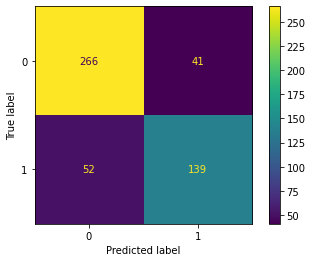

In [128]:
disp.plot()

In [129]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



## Exercise 3

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [130]:
tp = 266
fp = 52
fn = 41
tn = 139
all_4 = tp + fp + fn + tn

print(f'accuracy: {(tp + tn) / all_4}')
print(f'true_positive_rate: {tp / (tp + fn)}')
print(f'false_positive_rate: {fp / (fp + tn)}')
print(f'true_negative_rate: {tn / (tn + fp)}')
print(f'false_negative_rate: {fn /(fn + tp)}')
print(f'precision: {tp / (tp + fp)}')
print(f'recall: {tp / (tp + fn)}')
print(f'f1_score: {2 * ((precision * recall) / (precision + recall))}')
print(f'support_pos: {tp + fn}')
print(f'support_neg: {fp + tn}')

accuracy: 0.8132530120481928
true_positive_rate: 0.8664495114006515
false_positive_rate: 0.27225130890052357
true_negative_rate: 0.7277486910994765
false_negative_rate: 0.13355048859934854
precision: 0.8364779874213837
recall: 0.8664495114006515
f1_score: 0.9556962025316454
support_pos: 307
support_neg: 191


## Exercise 4

Run through steps 2-4 setting k to 10

In [131]:
# creating knn object
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [132]:
# fitting the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [133]:
# making predictions
y_pred = knn.predict(x_train)
y_pred[0:5]

array([1, 1, 0, 1, 1])

In [134]:
# estimating probability
y_pred_proba = knn.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.4, 0.6],
       [0.3, 0.7],
       [0.6, 0.4],
       [0.1, 0.9],
       [0.3, 0.7]])

In [135]:
# computing accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


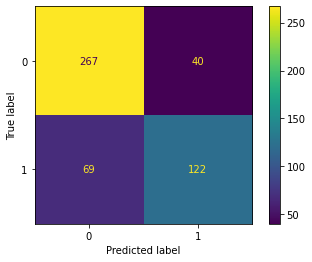

In [136]:
# finding a better way to make sense of confusion matrices
a = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(a, display_labels=None)
disp.plot()

In [137]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       307
           1       0.75      0.64      0.69       191

    accuracy                           0.78       498
   macro avg       0.77      0.75      0.76       498
weighted avg       0.78      0.78      0.78       498



In [138]:
tp = 267
fp = 69
fn = 40
tn = 122
all_4 = tp + fp + fn + tn

print(f'accuracy: {(tp + tn) / all_4}')
print(f'true_positive_rate: {tp / (tp + fn)}')
print(f'false_positive_rate: {fp / (fp + tn)}')
print(f'true_negative_rate: {tn / (tn + fp)}')
print(f'false_negative_rate: {fn /(fn + tp)}')
print(f'precision: {tp / (tp + fp)}')
print(f'recall: {tp / (tp + fn)}')
print(f'f1_score: {2 * ((precision * recall) / (precision + recall))}')
print(f'support_pos: {tp + fn}')
print(f'support_neg: {fp + tn}')

accuracy: 0.7811244979919679
true_positive_rate: 0.8697068403908795
false_positive_rate: 0.3612565445026178
true_negative_rate: 0.6387434554973822
false_negative_rate: 0.13029315960912052
precision: 0.7946428571428571
recall: 0.8697068403908795
f1_score: 0.9556962025316454
support_pos: 307
support_neg: 191


## Exercise 5

Run through setps 2-4 setting k to 20

In [139]:
# creating knn object
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [140]:
# fitting the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [141]:
# making predictions
y_pred = knn.predict(x_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [142]:
# estimating probability
y_pred_proba = knn.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.65, 0.35],
       [0.3 , 0.7 ],
       [0.65, 0.35],
       [0.45, 0.55],
       [0.3 , 0.7 ]])

In [143]:
# computing accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


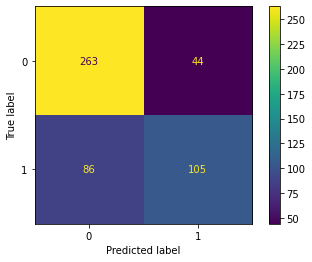

In [144]:
# finding a better way to make sense of confusion matrices
a = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(a, display_labels=None)
disp.plot()

In [145]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       307
           1       0.70      0.55      0.62       191

    accuracy                           0.74       498
   macro avg       0.73      0.70      0.71       498
weighted avg       0.73      0.74      0.73       498



In [146]:
tp = 263
fp = 86
fn = 44
tn = 105
all_4 = tp + fp + fn + tn

print(f'accuracy: {(tp + tn) / all_4}')
print(f'true_positive_rate: {tp / (tp + fn)}')
print(f'false_positive_rate: {fp / (fp + tn)}')
print(f'true_negative_rate: {tn / (tn + fp)}')
print(f'false_negative_rate: {fn /(fn + tp)}')
print(f'precision: {tp / (tp + fp)}')
print(f'recall: {tp / (tp + fn)}')
print(f'f1_score: {2 * ((precision * recall) / (precision + recall))}')
print(f'support_pos: {tp + fn}')
print(f'support_neg: {fp + tn}')

accuracy: 0.7389558232931727
true_positive_rate: 0.8566775244299675
false_positive_rate: 0.450261780104712
true_negative_rate: 0.5497382198952879
false_negative_rate: 0.14332247557003258
precision: 0.7535816618911175
recall: 0.8566775244299675
f1_score: 0.9556962025316454
support_pos: 307
support_neg: 191


## Exercise 6

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

**The difference in accuracy between the two models is 0.04 with n_neighbors set to 10 performing slightly better on the in-sample data**

**With lower n_neighbors, the model distinguishes more of the distinctive characteristics of each of the neighbors which improves accuracy for the in-sample data but may overfit the model which decreases the accuracy on the out-of-sample data**

**With higher n_neighbors, the model generalizes more to accommodate more data points which may decrease accuracy on the in-sample data but may increase the accuracy on the out-of-sample data**

## Exercise 7

Which model performs best on our out-of-sample data from validate?

In [204]:
# computing accuracy
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(x_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.67


**Model with n_neighbors set to 10 has accuracy of 0.72**

**Model with n_nighbors set to 20 has accuracy of 0.67**

**In this case, n_neighbors set to 10, is not overfit and performs best on the out-of-sample data**


# Logistic Regression Exercises

## Exercise 1

Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [148]:
# pulling in, cleaning, and splitting titanic data
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())
train.shape, validate.shape, test.shape

((498, 14), (214, 14), (179, 14))

In [149]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,0,1,1,0,0
165,1,3,male,9.0,0,2,20.5250,Southampton,0,0,1,0,0,1
50,0,3,male,7.0,4,1,39.6875,Southampton,0,0,1,0,0,1
259,1,2,female,50.0,0,1,26.0000,Southampton,0,1,0,0,0,1
306,1,1,female,NaN,0,0,110.8833,Cherbourg,1,1,0,1,0,0


In [150]:
train, validate, test = prepare.impute_mean_age(train, validate, test)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,0,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,0,1,0,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,0,1,0,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,1,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,1,0,1,0,0


In [151]:
# designating which features I want to use for modeling
x_cols = ['pclass', 'age', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [152]:
X_train.head()

,pclass,age,fare
583,1,36.000000,40.1250
165,3,9.000000,20.5250
50,3,7.000000,39.6875
259,2,50.000000,26.0000
306,1,29.678105,110.8833


In [153]:
# defining the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [154]:
#  fitting the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [155]:
# using model to make predictions
y_pred = logit.predict(X_train)
y_pred[0:5]

array([1, 0, 0, 0, 1])

In [156]:
# checking probability of those predictions
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.36988206, 0.63011794],
       [0.63810638, 0.36189362],
       [0.61748053, 0.38251947],
       [0.70385285, 0.29614715],
       [0.30445826, 0.69554174]])

In [157]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       307
           1       0.67      0.44      0.53       191

    accuracy                           0.70       498
   macro avg       0.69      0.65      0.66       498
weighted avg       0.70      0.70      0.69       498



**At 70% accuracy, this model does perform better than the 62% accuracy established by the baseline earlier**

## Exercise 2

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [158]:
# redesignating which features I want to use for modeling
x_cols = ['pclass', 'age', 'fare', 'sex_female']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [159]:
X_train.head()

,pclass,age,fare,sex_female
583,1,36.000000,40.1250,0
165,3,9.000000,20.5250,0
50,3,7.000000,39.6875,0
259,2,50.000000,26.0000,1
306,1,29.678105,110.8833,1


In [160]:
# defining the logistic regression model
logit = LogisticRegression(C=5, random_state=123)

In [161]:
#  fitting the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=5, random_state=123)

In [20]:
# using model to make predictions
y_pred = logit.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [21]:
# checking probability of those predictions
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.55696387, 0.44303613],
       [0.87053774, 0.12946226],
       [0.86897606, 0.13102394],
       [0.27528152, 0.72471848],
       [0.06516224, 0.93483776]])

In [22]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



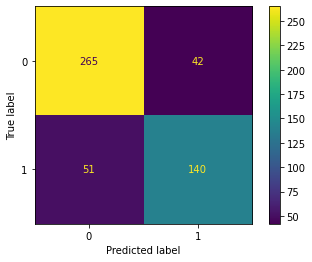

In [23]:
# finding a better way to make sense of confusion matrices
a = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(a, display_labels=None)
disp.plot()

## Exercise 3

Try out other combinations of features and models.

In [187]:
# redesignating which features I want to use for modeling, added alone
x_cols = ['pclass', 'age', 'fare', 'alone', 'sex_female']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [188]:
X_train.head()

,pclass,age,fare,alone,sex_female
583,1,36.000000,40.1250,1,0
165,3,9.000000,20.5250,0,0
50,3,7.000000,39.6875,0,0
259,2,50.000000,26.0000,0,1
306,1,29.678105,110.8833,1,1


In [189]:
# defining the logistic regression model, changed C = 25
logit = LogisticRegression(C=25, random_state=123)

In [190]:
#  fitting the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=25, random_state=123)

In [191]:
# using model to make predictions
y_pred = logit.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [192]:
# checking probability of those predictions
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.5493894 , 0.4506106 ],
       [0.87875033, 0.12124967],
       [0.87658996, 0.12341004],
       [0.28388036, 0.71611964],
       [0.05871876, 0.94128124]])

In [193]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       307
           1       0.75      0.74      0.74       191

    accuracy                           0.80       498
   macro avg       0.79      0.79      0.79       498
weighted avg       0.80      0.80      0.80       498



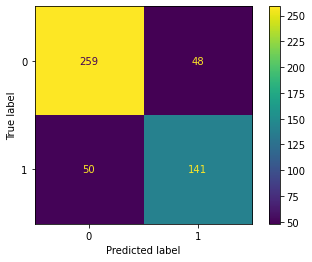

In [194]:
# finding a better way to make sense of confusion matrices
a = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(a, display_labels=None)
disp.plot()

**Tried different values of C (1, 5, 3, 20, 25, 100) without much change in accuracy. TP, TN, FP, FN values changed slightly

In [195]:
# redesignating which features I want to use for modeling, removed age
x_cols = ['pclass', 'alone', 'sex_female']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [64]:
X_train.head()

,pclass,alone,sex_female
583,1,1,0
165,3,0,0
50,3,0,0
259,2,0,1
306,1,1,1


In [196]:
# defining the logistic regression model
logit = LogisticRegression(C=12, random_state=123)

In [197]:
#  fitting the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=12, random_state=123)

In [198]:
# using model to make predictions
y_pred = logit.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [199]:
# checking probability of those predictions
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.5866604 , 0.4133396 ],
       [0.9125763 , 0.0874237 ],
       [0.9125763 , 0.0874237 ],
       [0.17591464, 0.82408536],
       [0.07451089, 0.92548911]])

In [200]:
# creating classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



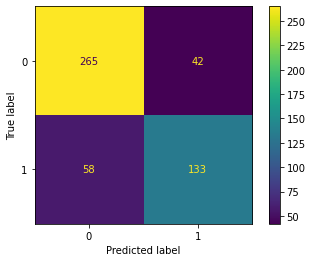

In [201]:
# finding a better way to make sense of confusion matrices
a = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(a, display_labels=None)
disp.plot()

## Exercise 4

Use you best 3 models to predict and evaluate on your validate sample.

### Using logistic regression with C=5

In [221]:
# redesignating which features I want to use for modeling
x_cols = ['pclass', 'age', 'fare','alone', 'sex_female']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [206]:
# defining the logistic regression model, changed C = 25
logit1 = LogisticRegression(C=5, random_state=123)

In [208]:
#  fitting the model on train data
logit1.fit(X_train, y_train)

LogisticRegression(C=5, random_state=123)

In [210]:
# computing accuracy
print('Accuracy of logistic regression classifier on train set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.80


In [209]:
# computing accuracy
print('Accuracy of logistic regression classifier on validate set: {:.2f}'
     .format(logit1.score(X_validate, y_validate)))

Accuracy of logistic regression classifier on validate set: 0.78


### Using Random Forest with max_depth = 11, and min_samples_leaf = 5

In [222]:
# creating random forest object with desired hyper-parameters
rf1 = RandomForestClassifier(max_depth=11, 
                            random_state=369, min_samples_leaf=5)
rf1

RandomForestClassifier(max_depth=11, min_samples_leaf=5, random_state=369)

In [223]:
# fitting model to train set
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=5, random_state=369)

In [224]:
# computing accuracy
print('Accuracy of random forest classifier on train set: {:.2f}'
     .format(rf1.score(X_train, y_train)))

Accuracy of random forest classifier on train set: 0.88


In [225]:
# computing accuracy
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf1.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


### Using Random Forest with max_depth = 10, and min_samples_leaf = 6

In [226]:
# creating random forest object with desired hyper-parameters
rf2 = RandomForestClassifier(max_depth=10, 
                            random_state=369, min_samples_leaf=6)
rf2

RandomForestClassifier(max_depth=10, min_samples_leaf=6, random_state=369)

In [227]:
# fitting model to train set
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, random_state=369)

In [228]:
# computing accuracy
print('Accuracy of random forest classifier on train set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

Accuracy of random forest classifier on train set: 0.88


In [229]:
# computing accuracy
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf2.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.79


## Exercise 5

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

### Using Random Forest with max_depth = 10, and min_samples_leaf = 6

In [230]:
# computing accuracy
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf1.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


**Takeaways**

**For the titanic data set, K-Nearest Neighbors, Decision Tree, and Logistic Regression models did not have as much accuracy as the Random Forest models did. With some tweaking of the features and hyperparameters, the final model was able to predict with 80% accuracy whether someone survived or not which is higher than the baseline model**